## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
import math
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6
import sklearn.cluster as cluster
import time

## File Reading and Description

In [2]:
df=pd.read_csv('CTA_L.csv')
df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,1/1/2001,U,290
1,40020,Harlem-Lake,1/1/2001,U,633
2,40030,Pulaski-Lake,1/1/2001,U,483
3,40040,Quincy/Wells,1/1/2001,U,374
4,40050,Davis,1/1/2001,U,804


In [3]:
df.tail()

,station_id,stationname,date,daytype,rides
879571,41700,Washington/Wabash,11/26/2017,U,4122
879572,41700,Washington/Wabash,11/27/2017,W,10244
879573,41700,Washington/Wabash,11/28/2017,W,10505
879574,41700,Washington/Wabash,11/29/2017,W,10437
879575,41700,Washington/Wabash,11/30/2017,W,10653


In [4]:
sum(df.isnull().any())

0

In [5]:
df.describe()

,station_id,rides
count,879576.000000,879576.000000
mean,40760.807241,3306.273856
std,445.372709,3184.652927
min,40010.000000,0.000000
25%,40370.000000,1123.000000
50%,40750.000000,2318.000000
75%,41150.000000,4350.000000
max,41700.000000,36323.000000


## Converting Date into usable format i.e. Years, Months and Days

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [7]:
df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2001-01-01,U,290
1,40020,Harlem-Lake,2001-01-01,U,633
2,40030,Pulaski-Lake,2001-01-01,U,483
3,40040,Quincy/Wells,2001-01-01,U,374
4,40050,Davis,2001-01-01,U,804


In [8]:
df['Weekday'] = df['date'].dt.weekday
df['Weekday_names'] = df['date'].dt.weekday_name
df['Month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [9]:
df.head()

,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
0,40010,Austin-Forest Park,2001-01-01,U,290,0,Monday,1,2001
1,40020,Harlem-Lake,2001-01-01,U,633,0,Monday,1,2001
2,40030,Pulaski-Lake,2001-01-01,U,483,0,Monday,1,2001
3,40040,Quincy/Wells,2001-01-01,U,374,0,Monday,1,2001
4,40050,Davis,2001-01-01,U,804,0,Monday,1,2001


## Warm up Question 1

In [10]:
def mean_daily_rides(df, station, daytype=None, weekday=None):
    dfstation = df[df['stationname'] == station]
    if daytype:
        return dfstation.loc[df['daytype'] == daytype, 'rides'].mean()
    else:
        return dfstation['rides'].mean()
def allstation_mean_daily_rides(df):
    daily_rides = list()
    for station in df['stationname'].unique():
        daily_rides.append((mean_daily_rides(df, station), station))
    return daily_rides

In [11]:
print(allstation_mean_daily_rides(df))

[(1536.4164374696652, 'Austin-Forest Park'), (3094.157281553398, 'Harlem-Lake'), (1436.1822150363782, 'Pulaski-Lake'), (5624.562287930199, 'Quincy/Wells'), (3321.967955979932, 'Davis'), (4144.272418807562, "Belmont-O'Hare"), (6037.916855386607, 'Jackson/Dearborn'), (4421.792071197411, 'Sheridan'), (1790.5993532740501, 'Damen-Brown'), (3835.090306946688, 'Morse'), (2242.6146254651353, '35th/Archer'), (954.282640349458, '51st'), (1855.6185842860618, 'Skokie'), (770.4288719857582, 'Pulaski-Cermak'), (2237.036875303251, 'LaSalle/Van Buren'), (1806.703769616567, 'Ashland-Lake'), (1335.7988691437804, 'Oak Park-Forest Park'), (3961.2649642160054, 'Sox-35th-Dan Ryan'), (5783.742071197411, 'Randolph/Wabash'), (939.5349514563106, 'Damen-Cermak'), (1213.3672316384182, 'Western-Forest Park'), (4036.9529430789134, 'Cumberland'), (6522.178861788618, '79th'), (1634.0402326708677, 'Kedzie-Homan-Forest Park'), (7731.669739608605, 'State/Lake'), (1035.384789644013, 'Main'), (1968.2139279366618, 'Central

In [12]:
df_new=pd.DataFrame(allstation_mean_daily_rides(df))
df_new.head()

,0,1
0,1536.416437,Austin-Forest Park
1,3094.157282,Harlem-Lake
2,1436.182215,Pulaski-Lake
3,5624.562288,Quincy/Wells
4,3321.967956,Davis


In [13]:
df_new=df_new.rename(columns={0:'Mean',1:'Station'})
df_new.head()

,Mean,Station
0,1536.416437,Austin-Forest Park
1,3094.157282,Harlem-Lake
2,1436.182215,Pulaski-Lake
3,5624.562288,Quincy/Wells
4,3321.967956,Davis


In [14]:
df_new=df_new.sort_values(by='Mean',ascending=False)
df_new.head()

,Mean,Station
36,13829.990290,Clark/Lake
140,13597.645469,Lake/State
135,12980.024603,Chicago/State
42,10747.604746,95th/Dan Ryan
124,10474.624474,Belmont-North Main


C:\Users\Akshay\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


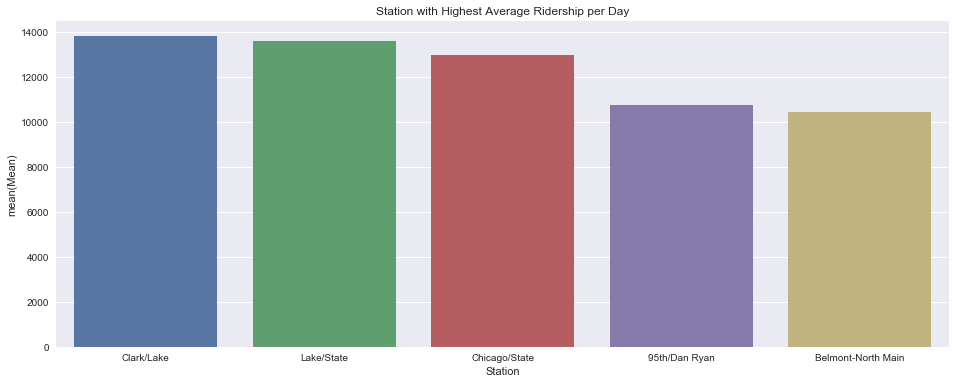

In [15]:
sns.barplot('Station','Mean',data=df_new.head())
plt.title('Station with Highest Average Ridership per Day')
plt.show()

##  The highest average ridership per day is for Clark/Lake:13829.990290

## Warm up Question 2

In [16]:
def std_daily_rides(station, daytype=None, weekday=None):
    df_station = df[df['stationname'] == station]
    if daytype:
        return df_station.loc[df['daytype'] == daytype, 'rides'].std()
    elif weekday:
        return df_station.loc[df['Weekday'] == weekday, 'rides'].std()
    else:
        return df_station['rides'].std()
    
def max_std_daily_rides(day=None):
    station_max, std_max = None, 0
    for station in df['stationname'].unique():
        station_std = std_daily_rides(station, daytype=day)
        station_max, std_max = (station, station_std) if station_std > std_max else (station_max, std_max)
    return station_max, std_max
station_max, std_max = max_std_daily_rides(day='W')

In [17]:
print(max_std_daily_rides(day='W'))

('Washington/Wabash', 4444.285215903786)


##  The stop that has the greatest standard deviation in weekday (exclude holidays) ridership per day is 'Washington/Wabash':4444.285215903786

## CHALLENGE BEGINS

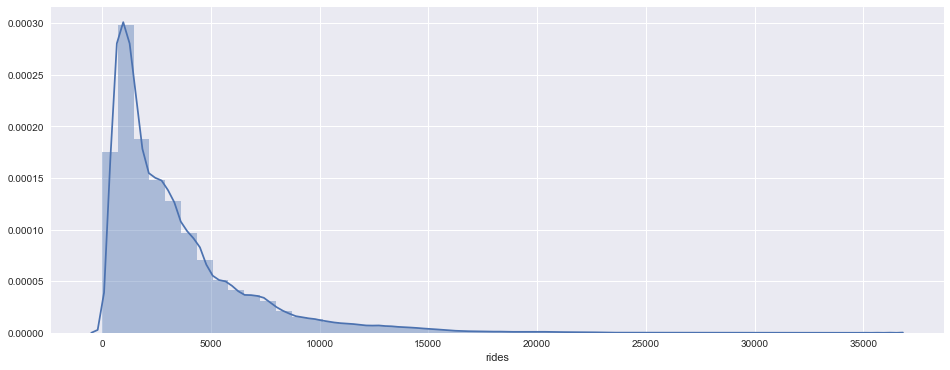

In [18]:
sns.distplot(df['rides'])
plt.show()

## What is the average number of rides during Weekday, Weekend and Holiday?

In [19]:
W = df[df['daytype'] == 'W']
A = df[df['daytype'] == 'A']
U = df[df['daytype'] == 'U']

In [90]:
W.shape

(614609, 9)

In [91]:
U.shape

(139955, 9)

In [20]:
w=W['rides'].mean().astype(int)
a=A['rides'].mean().astype(int)
u=U['rides'].mean().astype(int)

In [21]:
day_type=['Weekday','Weekend','Holiday']
mean_day_type=[W['rides'].mean().astype(int),A['rides'].mean().astype(int),U['rides'].mean().astype(int)]
df_daytype=pd.DataFrame(day_type,mean_day_type)
df_daytype=df_daytype.reset_index()

In [22]:

df_daytype=df_daytype.rename(columns={'index':'mean',0:'days'})
df_daytype.head()

,mean,days
0,3894,Weekday
1,2273,Weekend
2,1646,Holiday


C:\Users\Akshay\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


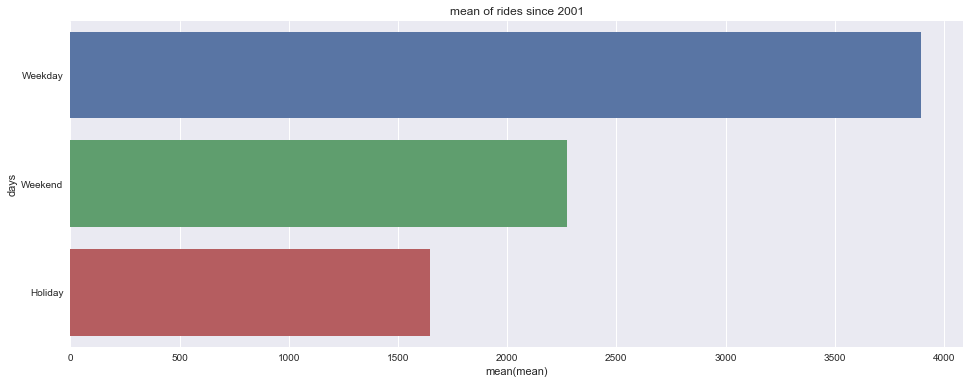

In [23]:
sns.barplot('mean','days',data=df_daytype)
plt.title('mean of rides since 2001')
plt.show()

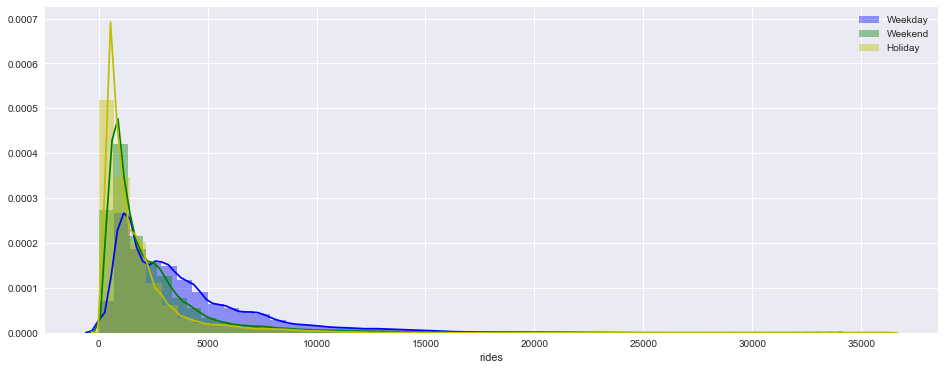

In [24]:

sns.distplot(W['rides'],color='b')
plt.hold,
sns.distplot(A['rides'],color='g')
plt.hold,
sns.distplot(U['rides'],color='y')
leg=('Weekday','Weekend','Holiday')
plt.legend(leg)
plt.show()

## The general hypothesis we can form from here is that people taking Trains on Holidays and Weekends are most probably staying close to stations. The intersection between Weekday, Weekend and Holiday is really valuable.


## The one thing that pops up in head is "Will people still use trains in future" or from the client perspective "Will there be enough traffic of people in future" ? 

## Let's be friends with 'Winter-Holts model' to help us determine this.

In [25]:
timedata =df[['year','Month','Weekday','rides']].head(1400)


In [26]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i])/slen
    return sum/slen

print ("initial trend factor:", initial_trend(timedata.rides, 76))

initial trend factor: 7.5296052631578965


In [27]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
        
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
        
    return seasonals

initial_seasonal_components(timedata.rides,76)

{0: -318.49342105263156,
 1: -251.21564327485373,
 2: 108.45102339181287,
 3: -34.937865497076146,
 4: -31.382309941520386,
 5: -150.99342105263156,
 6: -140.6045321637428,
 7: -171.38230994152048,
 8: -65.88230994152062,
 9: 1415.0065789473683,
 10: -211.60453216374273,
 11: -287.32675438596493,
 12: -206.1600877192982,
 13: 540.7288011695906,
 14: -227.27119883040936,
 15: 255.56213450292398,
 16: -346.38230994152053,
 17: -294.0489766081871,
 18: -501.10453216374276,
 19: 236.0621345029241,
 20: 1896.8399122807014,
 21: -262.3823099415205,
 22: -833.2156432748538,
 23: -147.16008771929825,
 24: 282.33991228070164,
 25: 106.33991228070181,
 26: 582.7288011695907,
 27: -615.1600877192983,
 28: -334.1600877192984,
 29: -582.9378654970761,
 30: 743.7843567251463,
 31: 1498.8954678362572,
 32: -181.38230994152045,
 33: -650.5489766081872,
 34: -256.10453216374276,
 35: 263.00657894736855,
 36: 162.2843567251462,
 37: 394.39546783625724,
 38: -386.1600877192984,
 39: -272.82675438596493,


In [28]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

result_series = triple_exponential_smoothing(timedata.rides, 76, 0.02, 0.03, 0.4, 76) #(series, periods, alpha, beta, gamma, n_predictions)

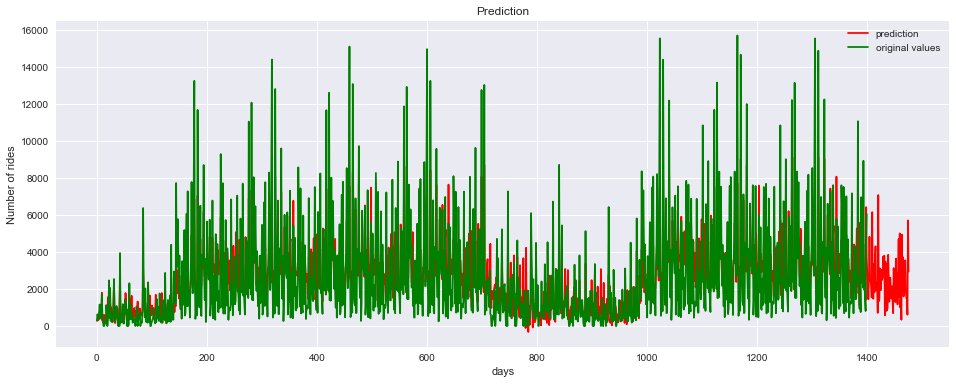

In [29]:
a = result_series
b = timedata.rides
#labels = df.year

plt.xlabel('days')
plt.ylabel('Number of rides')

plt.plot(a,'r', label = 'prediction') # plotting a separately 
plt.plot(b,'g', label = 'original values') # plotting b separately 

plt.legend()
plt.title('Prediction')

plt.show()

## Looking at this prediction we can be sure that in future there is going to be a similar trend of riders taking train.

## The data is from 2001-2017 and our client wants to see the the behavior of riders in the most recent year

## Let's just look at the data for 2017 and see if there is any anomaly

In [30]:
df_2017=df[df['year'] == 2017]

In [31]:
df_2017.head()

,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
831358,40010,Austin-Forest Park,2017-02-01,W,2160,2,Wednesday,2,2017
831359,40020,Harlem-Lake,2017-02-01,W,3810,2,Wednesday,2,2017
831360,40030,Pulaski-Lake,2017-02-01,W,1543,2,Wednesday,2,2017
831361,40040,Quincy/Wells,2017-02-01,W,8231,2,Wednesday,2,2017
831362,40050,Davis,2017-02-01,W,3602,2,Wednesday,2,2017


In [32]:
df_2017.shape

(48218, 9)

## It will be very interesting to see which stations have the highest mean riders in 2017. Is there any change or is it the same as for the entire year?

In [33]:
stationname_2017=df_2017.groupby('stationname')['rides'].mean()

In [34]:
stationname_2017 = pd.DataFrame(stationname_2017)

In [35]:
stationname_2017.head()

,rides
stationname,
18th,1637.044910
35-Bronzeville-IIT,1517.380240
35th/Archer,2653.694611
43rd,880.089820
47th-Dan Ryan,2505.443114


In [36]:
stationname_2017_sorted=stationname_2017.sort_values(by='rides',ascending=False)

In [37]:
stationname_2017_sorted=stationname_2017_sorted.reset_index()

In [38]:
stationname_2017_sorted.columns

Index(['stationname', 'rides'], dtype='object')

C:\Users\Akshay\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


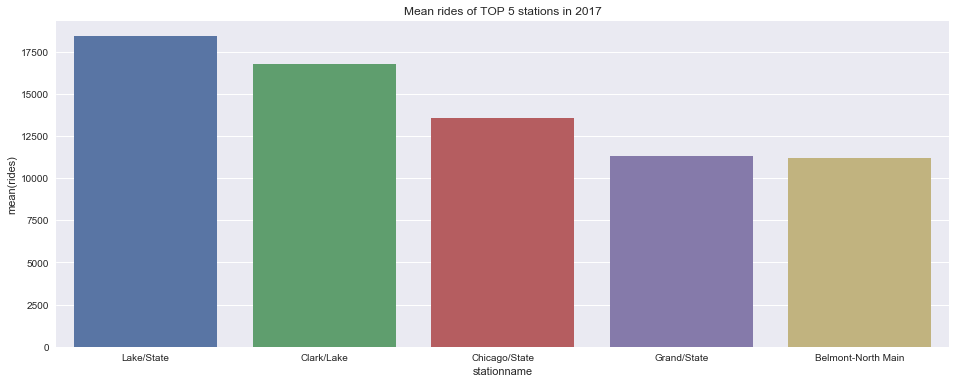

In [39]:
sns.barplot('stationname','rides',data=stationname_2017_sorted.head())
plt.title('Mean rides of TOP 5 stations in 2017')
plt.show()

## Looks like Lake/State and Clark/Lake is still the busiest stations even in 2017. 

## Lets also check the distribution of rides in entire dataset vs dataset of 2017.

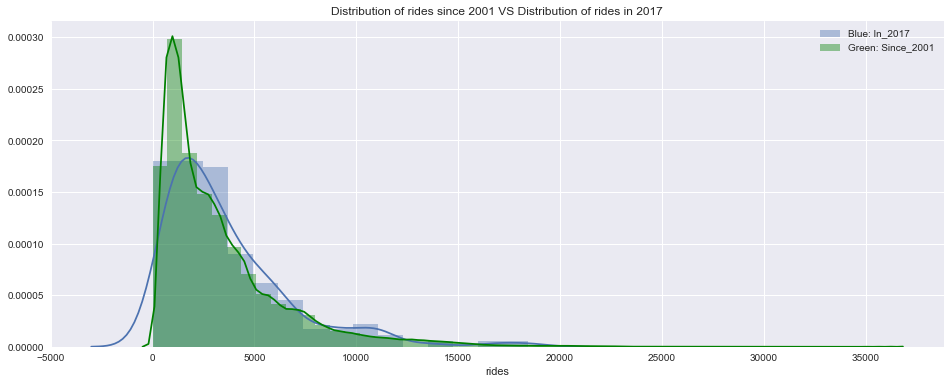

In [40]:
sns.distplot(stationname_2017_sorted['rides'])
plt.hold,
sns.distplot(df['rides'],color='g')
plt.title('Distribution of rides since 2001 VS Distribution of rides in 2017')
dicti=('Blue: In_2017','Green: Since_2001')
plt.legend(dicti)
plt.show()


In [41]:
df_2017=df_2017.reset_index()

In [42]:
df_2017.head()

,index,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
0,831358,40010,Austin-Forest Park,2017-02-01,W,2160,2,Wednesday,2,2017
1,831359,40020,Harlem-Lake,2017-02-01,W,3810,2,Wednesday,2,2017
2,831360,40030,Pulaski-Lake,2017-02-01,W,1543,2,Wednesday,2,2017
3,831361,40040,Quincy/Wells,2017-02-01,W,8231,2,Wednesday,2,2017
4,831362,40050,Davis,2017-02-01,W,3602,2,Wednesday,2,2017


## Winter-Holts Forecasting of rides just using 2017 data.

In [43]:
timedata_new =df_2017[['year','Month','Weekday','rides']].head(4000)

In [44]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i])/slen
    return sum/slen

print ("initial trend factor:", initial_trend(timedata_new.rides, 76))

initial trend factor: -3.7468836565096972


In [45]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
        
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
        
    return seasonals

initial_seasonal_components(timedata_new.rides,76)

{0: -57.53542510121456,
 1: -477.20850202429125,
 2: 244.19534412955474,
 3: 82.61842105263165,
 4: -42.84311740890683,
 5: -222.90080971659913,
 6: -137.61234817813764,
 7: 403.3491902834008,
 8: 375.5991902834008,
 9: -684.1123481781374,
 10: 427.2338056680164,
 11: 1.541497975708554,
 12: 95.54149797570858,
 13: -246.38157894736835,
 14: -423.15080971659916,
 15: 346.676113360324,
 16: 128.63765182186242,
 17: -623.1315789473682,
 18: 562.4453441295544,
 19: -1.6508097165991733,
 20: 345.6184210526317,
 21: -152.82388663967592,
 22: -249.57388663967612,
 23: 238.1568825910931,
 24: -93.03542510121454,
 25: -732.7854251012145,
 26: 349.4068825910933,
 27: 251.4645748987855,
 28: 480.3876518218623,
 29: -105.99696356275298,
 30: -74.20850202429148,
 31: 210.46457489878543,
 32: -348.68927125506065,
 33: -499.073886639676,
 34: 206.7914979757085,
 35: 307.272267206478,
 36: 656.253036437247,
 37: -28.054655870445398,
 38: -177.073886639676,
 39: 168.23380566801626,
 40: -161.8238866396

In [46]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

result_series = triple_exponential_smoothing(timedata_new.rides, 76, 0.02, 0.03, 0.4, 76) #(series, periods, alpha, beta, gamma, n_predictions)

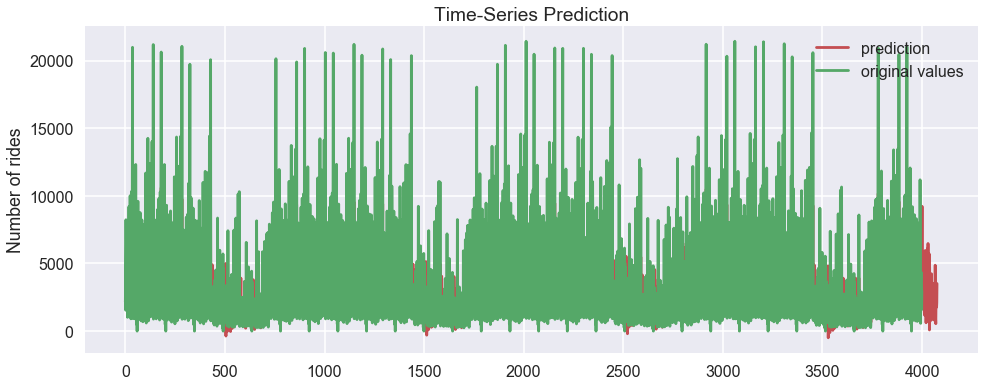

In [104]:
from numpy import *
import math
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6

a = result_series
b = timedata_new.rides
#labels = df.year

plt.ylabel('Number of rides')

plt.plot(a,'r', label = 'prediction') # plotting a separately 
plt.plot(b,'g', label = 'original values') # plotting b separately 

plt.legend()
plt.title('Time-Series Prediction')

plt.show()

## Daytype Comparision for 2017 data

In [48]:
weekday_2017=df_2017.groupby('daytype')['rides'].mean()

In [49]:
weekday_2017.head()

daytype
A    2491.383198
U    1899.248987
W    4255.076550
Name: rides, dtype: float64

In [50]:
weekday_2017=pd.DataFrame(weekday_2017)

In [51]:
weekday_2017.head()

,rides
daytype,
A,2491.383198
U,1899.248987
W,4255.076550


In [52]:
weekday_2017=weekday_2017.reset_index()

In [53]:
weekday_2017.columns

Index(['daytype', 'rides'], dtype='object')

C:\Users\Akshay\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


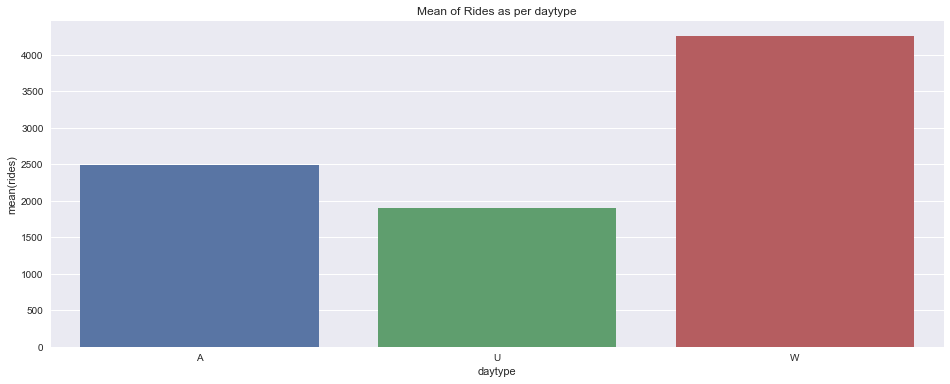

In [54]:
sns.barplot('daytype','rides',data=weekday_2017)
plt.title('Mean of Rides as per daytype')
plt.show()

## Suppose our client is curious to know which seasons have the highest traffic as there is a high chance of generating profits during that period .

In [55]:
month_2017=df_2017.groupby('Month')['rides'].mean()

In [56]:
month_2017=pd.DataFrame(month_2017)
month_2017.head()

,rides
Month,
1,3276.598790
2,3507.541171
3,3600.606855
4,3511.369676
5,3651.094310


In [57]:
month_2017=month_2017.reset_index()

In [58]:
month_2017.columns

Index(['Month', 'rides'], dtype='object')

C:\Users\Akshay\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


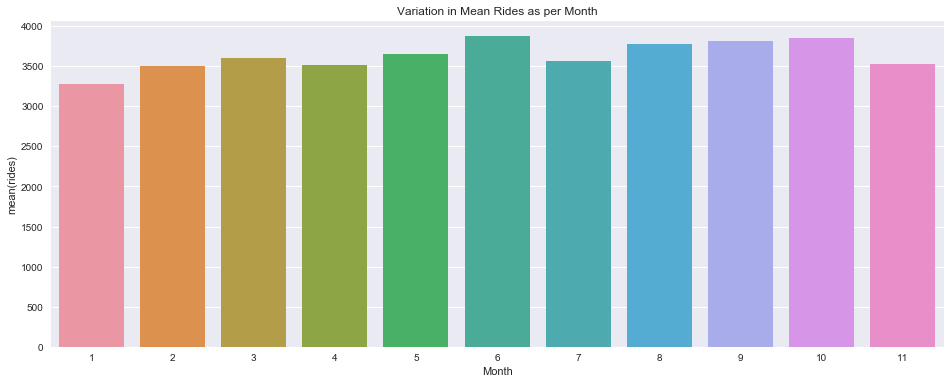

In [59]:
sns.barplot ('Month','rides',data=month_2017)
plt.title('Variation in Mean Rides as per Month')
plt.show()

## We can conclude that traffic is higher in the summer and fall from June to October as compared to cooler months.

## Looking at the trend of rides against various years

In [60]:
df_year_trend=df.groupby('year')['rides'].mean()

In [61]:
df_year_trend=pd.DataFrame(df_year_trend)

In [62]:
df_year_trend.head()

,rides
year,
2001,2934.432450
2002,2939.698090
2003,2900.242717
2004,2853.698376
2005,2990.298225


In [63]:
df_year_trend=df_year_trend.reset_index()

In [64]:
df_year_trend.head()

,year,rides
0,2001,2934.432450
1,2002,2939.698090
2,2003,2900.242717
3,2004,2853.698376
4,2005,2990.298225


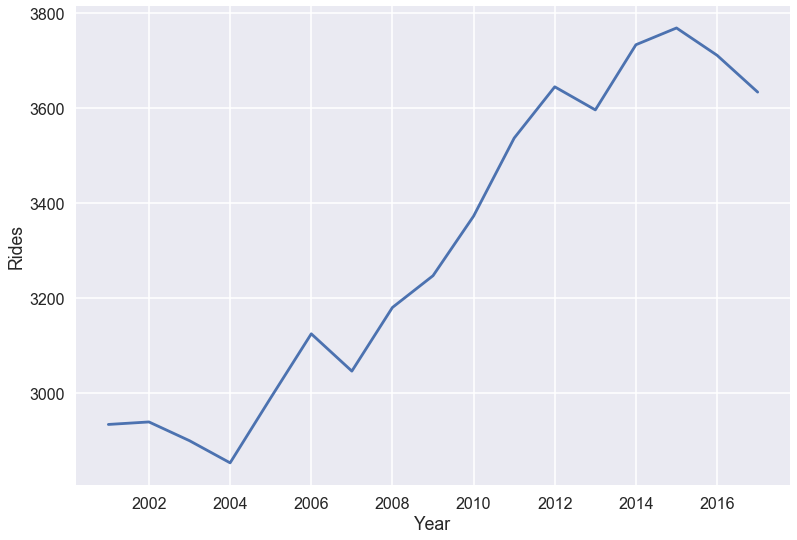

In [93]:
sns.set_style("darkgrid")
plt.plot(df_year_trend['year'],df_year_trend['rides'])
plt.xlabel('Year')
plt.ylabel('Rides')
plt.xlim()
plt.show()

## Now let's target specific station and see their behavior. 

## Clark/Lake Analysis

In [66]:
df_clark_lake=df[df['stationname']=='Clark/Lake']

In [67]:
df_clark_lake.head()

,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
36,40380,Clark/Lake,2001-01-01,U,1080,0,Monday,1,2001
177,40380,Clark/Lake,2001-01-02,W,13263,1,Tuesday,1,2001
318,40380,Clark/Lake,2001-01-03,W,14416,2,Wednesday,1,2001
459,40380,Clark/Lake,2001-01-04,W,15118,3,Thursday,1,2001
600,40380,Clark/Lake,2001-01-05,W,14980,4,Friday,1,2001


In [68]:
df_clark_lake=df_clark_lake.groupby('year')['rides'].mean()

In [69]:
df_clark_lake=pd.DataFrame(df_clark_lake)

In [70]:
df_clark_lake=df_clark_lake.reset_index()

In [71]:
df_clark_lake.head()

,year,rides
0,2001,11704.734247
1,2002,11262.602740
2,2003,11174.063014
3,2004,11109.918033
4,2005,11795.490411


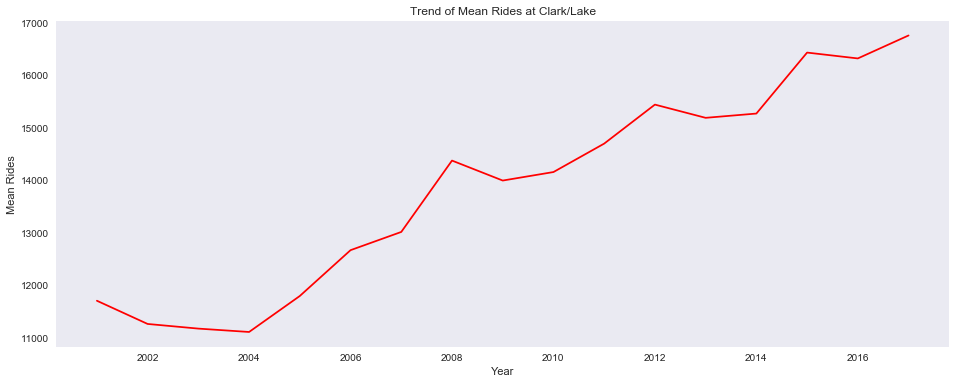

In [72]:
sns.set_style("dark")
plt.plot(df_clark_lake['year'],df_clark_lake['rides'],color='r')
plt.xlabel('Year')
plt.ylabel('Mean Rides')
plt.title('Trend of Mean Rides at Clark/Lake')
plt.show()

## WOAH! That seems like optimistic trend. We can make an hypothesis of Clark/Lake having a good traffic in future.

## Let's analyse State/Lake

In [73]:
df_lake_state=df[df['stationname']=='Lake/State']

In [74]:
df_lake_state=df_lake_state.groupby('year')['rides'].mean()

In [75]:
df_lake_state=df_lake_state.reset_index()

In [76]:
df_lake_state.head()

,year,rides
0,2001,11150.312329
1,2002,11385.334247
2,2003,10786.241096
3,2004,8711.366120
4,2005,6569.747945


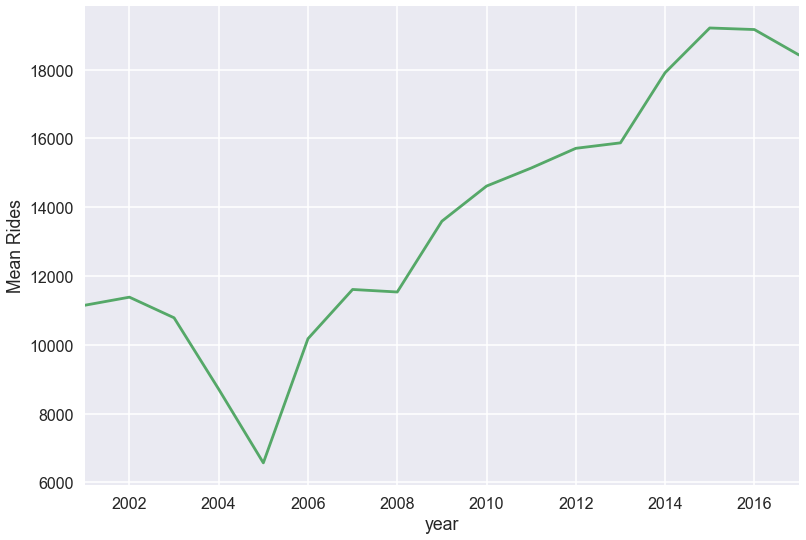

In [94]:
sns.tsplot(df_lake_state['rides'],df_lake_state['year'],color='g')
plt.ylabel('Mean Rides')
plt.show()

In [77]:
## Instead of plotting trend just of State/Lake, lets compare it with Clark/Lake.

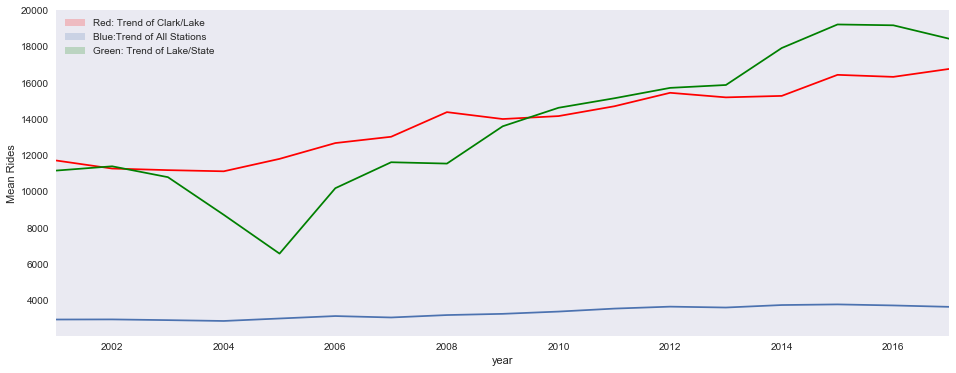

In [78]:
sns.tsplot(df_clark_lake['rides'],df_clark_lake['year'],color='r')
plt.hold,
sns.tsplot(df_year_trend['rides'],df_year_trend['year'])
plt.hold,
sns.tsplot(df_lake_state['rides'],df_lake_state['year'],color='g')
dictio=('Red: Trend of Clark/Lake','Blue:Trend of All Stations','Green: Trend of Lake/State')
plt.legend(dictio)
plt.ylabel('Mean Rides')
plt.show()

## Even though the mean rides of State/lake is higher than Clark/Lake, the trend of of Clark/Lake is more uniform.
## Checking individual distribution.

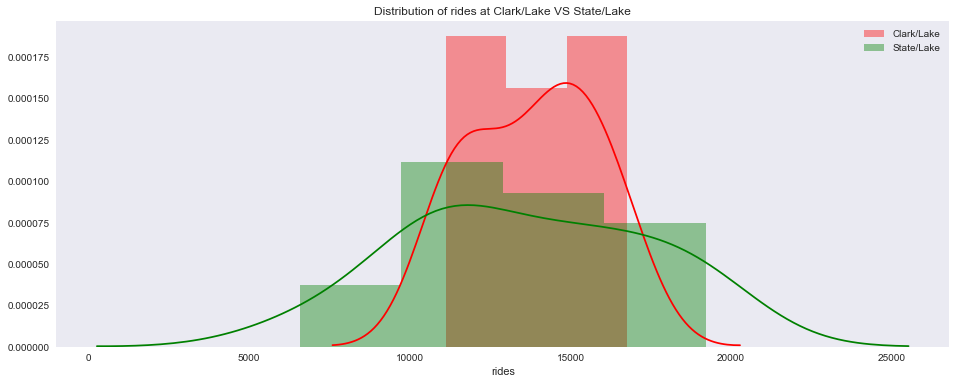

In [79]:
sns.distplot(df_clark_lake['rides'],color='r'),
plt.hold,
sns.distplot(df_lake_state['rides'],color='g')
plt.title('Distribution of rides at Clark/Lake VS State/Lake')
d=('Clark/Lake','State/Lake')
plt.legend(d)
plt.show()

## Is there any-way we can generalize riders behavior?


## Let's do Clustering based on station name and rides.

In [80]:
df_2017.head()

,index,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
0,831358,40010,Austin-Forest Park,2017-02-01,W,2160,2,Wednesday,2,2017
1,831359,40020,Harlem-Lake,2017-02-01,W,3810,2,Wednesday,2,2017
2,831360,40030,Pulaski-Lake,2017-02-01,W,1543,2,Wednesday,2,2017
3,831361,40040,Quincy/Wells,2017-02-01,W,8231,2,Wednesday,2,2017
4,831362,40050,Davis,2017-02-01,W,3602,2,Wednesday,2,2017


In [81]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [82]:
from sklearn.preprocessing import LabelEncoder
cols = ['stationname','daytype','Weekday_names']

for x in cols:
    lbl = LabelEncoder()
    df_2017[x] = lbl.fit_transform(df_2017[x])

In [83]:
df_2017.head()

,index,station_id,stationname,date,daytype,rides,Weekday,Weekday_names,Month,year
0,831358,40010,22,2017-02-01,2,2160,2,6,2,2017
1,831359,40020,69,2017-02-01,2,3810,2,6,2,2017
2,831360,40030,118,2017-02-01,2,1543,2,6,2,2017
3,831361,40040,120,2017-02-01,2,8231,2,6,2,2017
4,831362,40050,51,2017-02-01,2,3602,2,6,2,2017


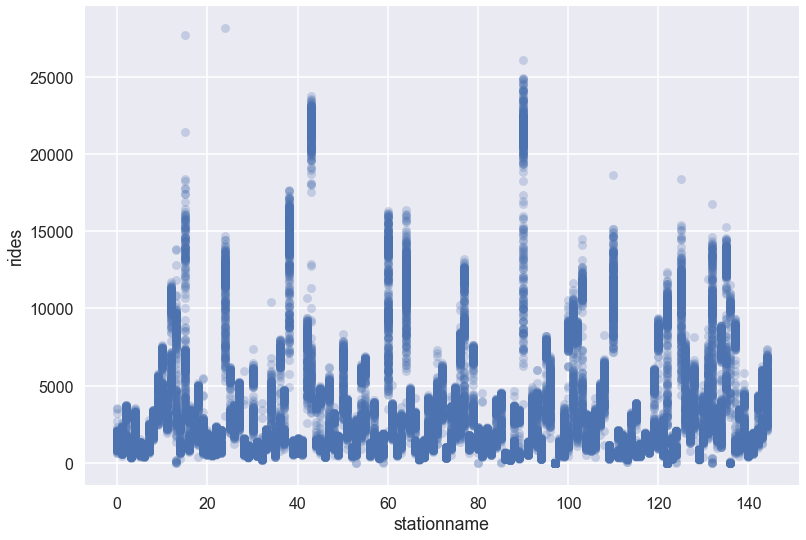

In [98]:

data=df_2017[['stationname','rides']].values
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)
plt.xlabel('stationname')
plt.ylabel('rides')
plt.show()

In [99]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

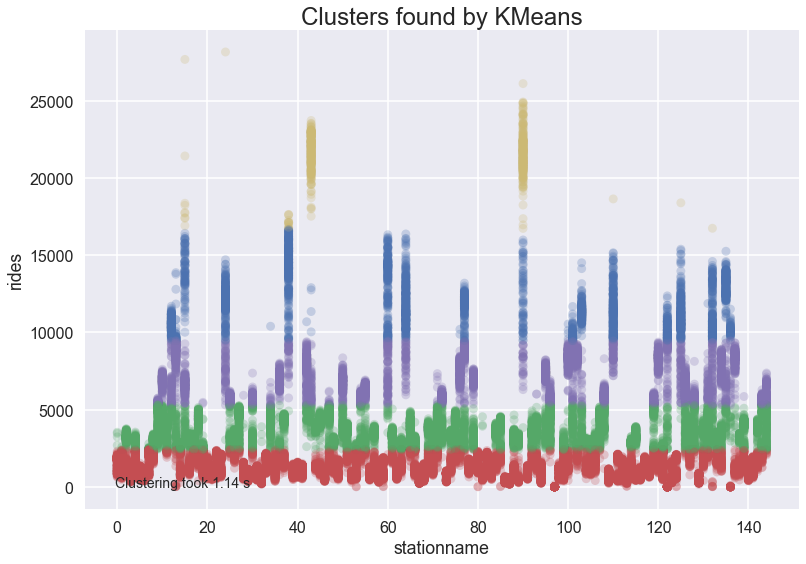

In [101]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})
plt.xlabel('stationname')
plt.ylabel('rides')
plt.show()

## This looks intutive as we can assume the following:
## People in the red cluster are not daily travellers, maybe they live too far from stations or maybe they dont prefer to take trains.
## People in the green, yellow and purple clusters are daily travellers as they might live very close to the stations or they just find the trains more convenient.
## Stations having just red and blue clusters can be considered as the least traffic stations.